### Latent variable Model (part III)

#### Part I: Fast ICA

The Fast ICA algorithm tries to recover independent sources from their mixture by looking for the inverse $\mathbf{W}$ of the mixing matrix $\mathbf{A}$ such that $\mathbf{W}\mathbf{x} = \mathbf{s}$ by maximizing the kurtosis of the the signals $\mathbf{W}\mathbf{x}$. before studying recovery through FastICA, generate a set of points following the laplace (supergaussian) gaussian and uniform (subgaussian) distributions. Then compute the kurtosis of the set of points using the stats library.

In [ ]:
from scipy.stats import kurtosis

# put your code here 




Concretely, FastICA relies on the following steps:


1- Whiten the data. This can be done through PCA by computing the eigenvalue decomposition of the covariance matrix $\frac{1}{N}\sum_{i=1}^N \mathbf{x}^{(i)}\mathbf{x}^{(i), T}$

2- Compute the rows of the demixing matrix $\mathbf{W}$, starting with a random initial vector $\mathbf{w}$, as follows 

   - $\mathbf{w}^+ = \mathbb{E}_N \left\{(\mathbf{w}^T\mathbf{z})^3\mathbf{z} - 3\mathbf{w}\|\mathbf{w}\|^2\right\}$
    
   - $\mathbf{w}^+ = \mathbf{w}^+ - \sum_{i=1}^p \mathbf{w}_i\mathbf{w}_i^T\mathbf{w}^+$
    
   - $\mathbf{w} = \frac{\mathbf{w}^+}{\|\mathbf{w}^+\|}$

Code an apply the fastICA iterations to two sources generated from Laplace distribubtions. Study the evolution of $\mathbf{W}$ as the number of samples increases. 

In [ ]:
# put your code here



A more general form of the FastICA algorithm can be defined for a general function $g$ as shown below. 

1- Whiten the data. This can be done through PCA by computing the eigenvalue decomposition of the covariance matrix $\frac{1}{N}\sum_{i=1}^N \mathbf{x}^{(i)}\mathbf{x}^{(i), T}$

2- Compute the rows of the demixing matrix $\mathbf{W}$, starting with a random initial vector $\mathbf{w}$, as follows 

   - $\mathbf{w}^+ = \mathbb{E}_N \left\{g(\mathbf{w}^T\mathbf{z})\mathbf{z} - \mathbf{w}g'(\mathbf{w}^T\mathbf{z})'\right\}$
    
   - $\mathbf{w}^+ = \mathbf{w}^+ - \sum_{i=1}^p \mathbf{w}_i\mathbf{w}_i^T\mathbf{w}^+$
    
   - $\mathbf{w} = \frac{\mathbf{w}^+}{\|\mathbf{w}^+\|}$
   
A typical choice for the function $g$ and its derivative is the hyperbolic tangent, $g(x) = \text{tanh}(x)$ and $g'(x) = 1- \text{tanh}^2(x)$. Extend your algorithm with a parameter that can switch between kurtosis ($g'(x) = x^3$) and $g'(x) = \text{tanh}(x)$

In [ ]:
# Put your code here



Apply the FastICA to the sound signals used in Lab8 and study the evoution of the recovered matrix as the number of samples increases. 

In [ ]:
# put your code here



#### Part II: ISOMAP

Consider the dataset given below. ISOmetric feature MAPoing computes a representation of the dataset by relying on geodesic distances. ISOMAP can be summarized as follows:

- Build a graph by relying the $\varepsilon$ rule of the $K$ rule
- Weight the graph. by labelling each edge with its euclidean length
- Compute each pairwise distance by using Dijkstra's algorithm, square them and store them in the distance matrix $\mathbf{D}$.  
- Convert the distance matrix into a similarity (scalar product) matrix by using the double centering step 

$$\mathbf{S} = -\frac{1}{2}(\mathbf{I} - \frac{1}{N}\mathbf{1}\mathbf{1}^T)\mathbf{D}(\mathbf{I} - \frac{1}{N}\mathbf{1}\mathbf{1}^T)$$

- Once the similarity matrix is known, compute its spectral decomposition $\mathbf{S} = \mathbf{U}\mathbf{\Lambda}\mathbf{U}^T$
- The $p$-dimensional representation of the original dataset is obtained by retaining the first k principal components 
$$\hat{\mathbf{X}} = \mathbf{I}_{P\times N}\mathbf{\Lambda}^{1/2}\mathbf{U}^T$$

In the $K$ rule, each point is connected to the $K$ closest points. In the epsilon rule, each point is connected to all the other points lying in an $\epsilon$ ball centered on $\mathbf{x}^{(i)}$. 

Find a one dimensional representation of this dataset through PCA first and then ISOMAP. Draw the ISOMAP graph on top of the data. 

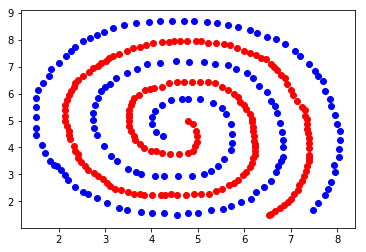

In [7]:
import scipy.io
dataClass1 = scipy.io.loadmat('pointsClass1demoISOMAP.mat')['pointsClass1demoISOMAP']
dataClass2 = scipy.io.loadmat('pointsClass2demoISOMAP.mat')['pointsClass2demoISOMAP']

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(dataClass1[:,0], dataClass1[:,1], c='b')
plt.scatter(dataClass2[:,0], dataClass2[:,1], c='r')
plt.show()
